In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('BI.csv')
df.head(3)

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,05-12-2012 01:31,01-01-2013 00:21,Acute Stroke Unit,A/E,Private Patient,ED
1,2,41,Adult Urology,Surgical,Damian Hinds,31-12-2012 17:01,01-01-2013 09:17,Lane,A/E,Public Patient,ED
2,3,46,Adult Cardiology,Medical,Frank Field,31-12-2012 14:29,01-01-2013 12:00,CCU,A/E,Private Patient,Emergency OPD Admission


In [ ]:
# missing data check
df.isna().sum()

Patient ID                 0
Age                        0
Specialty                  0
Directorate                0
Doctor                     0
Admission date and time    0
Discharge Date and Time    0
Ward                       0
Admission Type             0
Admission Category         0
Admission Source           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient ID               12411 non-null  int64 
 1   Age                      12411 non-null  int64 
 2   Specialty                12411 non-null  object
 3   Directorate              12411 non-null  object
 4   Doctor                   12411 non-null  object
 5   Admission date and time  12411 non-null  object
 6   Discharge Date and Time  12411 non-null  object
 7   Ward                     12411 non-null  object
 8   Admission Type           12411 non-null  object
 9   Admission Category       12411 non-null  object
 10  Admission Source         12411 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
df.columns

Index(['Patient ID', 'Age', 'Specialty', 'Directorate', 'Doctor',
       'Admission date and time', 'Discharge Date and Time', 'Ward',
       'Admission Type', 'Admission Category', 'Admission Source'],
      dtype='object')

In [ ]:
from datetime import datetime

In [ ]:
df['Admission date and time']= pd.to_datetime(df['Admission date and time'], format = "%d-%m-%Y %H:%M")
df['Discharge Date and Time'] = pd.to_datetime(df['Discharge Date and Time'], format = "%d-%m-%Y %H:%M")
# df['Admission date and time'] = df['Admission date and time'].astype('string')

In [ ]:
df.head()

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,2012-12-05 01:31:00,2013-01-01 00:21:00,Acute Stroke Unit,A/E,Private Patient,ED
1,2,41,Adult Urology,Surgical,Damian Hinds,2012-12-31 17:01:00,2013-01-01 09:17:00,Lane,A/E,Public Patient,ED
2,3,46,Adult Cardiology,Medical,Frank Field,2012-12-31 14:29:00,2013-01-01 12:00:00,CCU,A/E,Private Patient,Emergency OPD Admission
3,4,7,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:35:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED
4,5,8,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:31:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient ID               12411 non-null  int64         
 1   Age                      12411 non-null  int64         
 2   Specialty                12411 non-null  object        
 3   Directorate              12411 non-null  object        
 4   Doctor                   12411 non-null  object        
 5   Admission date and time  12411 non-null  datetime64[ns]
 6   Discharge Date and Time  12411 non-null  datetime64[ns]
 7   Ward                     12411 non-null  object        
 8   Admission Type           12411 non-null  object        
 9   Admission Category       12411 non-null  object        
 10  Admission Source         12411 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.0+ MB


## Compute Length of Stay for Patients

In [ ]:
df['LOS'] = df['Discharge Date and Time'] - df['Admission date and time'] 
df['LOS'] = (df['LOS'].dt.days )+ 1

In [ ]:
df.head()

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source,LOS
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,2012-12-05 01:31:00,2013-01-01 00:21:00,Acute Stroke Unit,A/E,Private Patient,ED,27
1,2,41,Adult Urology,Surgical,Damian Hinds,2012-12-31 17:01:00,2013-01-01 09:17:00,Lane,A/E,Public Patient,ED,1
2,3,46,Adult Cardiology,Medical,Frank Field,2012-12-31 14:29:00,2013-01-01 12:00:00,CCU,A/E,Private Patient,Emergency OPD Admission,1
3,4,7,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:35:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1
4,5,8,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:31:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1


In [ ]:
df['Admission Source'] = df['Admission Source'].astype('category')
df['Specialty'] = df['Specialty'].astype('category')
df['Directorate'] = df['Directorate'].astype('category')
df['Doctor'] = df['Doctor'].astype('category')
df['Admission Category'] = df['Admission Category'].astype('category')
df['Admission Source'] = df['Admission Source'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient ID               12411 non-null  int64         
 1   Age                      12411 non-null  int64         
 2   Specialty                12411 non-null  category      
 3   Directorate              12411 non-null  category      
 4   Doctor                   12411 non-null  category      
 5   Admission date and time  12411 non-null  datetime64[ns]
 6   Discharge Date and Time  12411 non-null  datetime64[ns]
 7   Ward                     12411 non-null  object        
 8   Admission Type           12411 non-null  object        
 9   Admission Category       12411 non-null  category      
 10  Admission Source         12411 non-null  category      
 11  LOS                      12411 non-null  int64         
dtypes: category(5), datetime64[ns](2

# Grouping the patients into adult and child categories
0 -16 years ==> Child

greater than 16 ==> Adult

In [ ]:
import pandas as pd 

def setCategory(c):
    if c >=0 and c <=16:
        return 'Child'
    elif c >=16 and c <= 200:
        return 'Adult'

df['ageGrp'] = df['Age'].apply(setCategory)

In [ ]:
df.head()

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source,LOS,ageGrp
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,2012-12-05 01:31:00,2013-01-01 00:21:00,Acute Stroke Unit,A/E,Private Patient,ED,27,Adult
1,2,41,Adult Urology,Surgical,Damian Hinds,2012-12-31 17:01:00,2013-01-01 09:17:00,Lane,A/E,Public Patient,ED,1,Adult
2,3,46,Adult Cardiology,Medical,Frank Field,2012-12-31 14:29:00,2013-01-01 12:00:00,CCU,A/E,Private Patient,Emergency OPD Admission,1,Adult
3,4,7,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:35:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child
4,5,8,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:31:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child


# Regression Model


In [ ]:
# Calculate Coefficients
 
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
  
# calculate coefficients
x = df['Age']
y = df['LOS']
x_mean, y_mean = mean(x), mean(y)
b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
b0 = y_mean - b1 * x_mean
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=1.123, B1=0.110


In [ ]:
from math import sqrt
import numpy as np
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	df['predictedLOS'] = predicted[0]
	actual = [row[-1] for row in dataset]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	for row in test:
		yhat = (b0 + b1 )* y
		predictions.append(yhat)
	return predictions
 
# Test simple linear regression
evaluate_algorithm(df, simple_linear_regression)
df['predictedLOS'] = df['predictedLOS'].astype(np.int64)


In [ ]:
#Evaluate the Predictions
diff = (df['predictedLOS'] - df['LOS']) ** 2
meandiff = diff.sum()/ len('LOS')
rmse = sqrt(meandiff)
print("RMSE OF OREDICTION", rmse)

RMSE OF OREDICTION 224.43261795024358


## Computing Bed Requirement

In [ ]:
#Bed requirement is calcualted using formula BR = (No.of Patient Admissions*Average LOS)/365

avgLOS = df['LOS'].mean() # avearge of Length of stay
n = len(pd.unique(df['Admission date and time']))  #unique dates in the data
avgAdmRate = df['Admission date and time'].count()/n #average admissions per day
totalPatients = df['Patient ID'].count()   #toatlpatients


bedRequired = (totalPatients * avgAdmRate * avgLOS) / 365
print("Bed Required", bedRequired)

Bed Required 227.78514754384435


## Increasing the age by factor of 20%

In [ ]:
df['newAge'] = df['Age']*1.2

In [ ]:
df['newAgeGrp'] = df['newAge'].apply(setCategory)

In [ ]:
df.head()

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source,LOS,ageGrp,predictedLOS,newAge,newAgeGrp
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,2012-12-05 01:31:00,2013-01-01 00:21:00,Acute Stroke Unit,A/E,Private Patient,ED,27,Adult,33,91.2,Adult
1,2,41,Adult Urology,Surgical,Damian Hinds,2012-12-31 17:01:00,2013-01-01 09:17:00,Lane,A/E,Public Patient,ED,1,Adult,1,49.2,Adult
2,3,46,Adult Cardiology,Medical,Frank Field,2012-12-31 14:29:00,2013-01-01 12:00:00,CCU,A/E,Private Patient,Emergency OPD Admission,1,Adult,1,55.2,Adult
3,4,7,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:35:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child,1,8.4,Child
4,5,8,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:31:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child,1,9.6,Child


# Predict Length of Stay for Increased Age

In [ ]:
# Calculate Coefficients
 
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
  
# calculate coefficients
x = df['newAge']
y = df['LOS']
x_mean, y_mean = mean(x), mean(y)
b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
b0 = y_mean - b1 * x_mean
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=1.123, B1=0.092


In [ ]:
from math import sqrt
import numpy as np
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	df['newAgepredictedLOS'] = predicted[0]
	actual = [row[-1] for row in dataset]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	for row in test:
		yhat = (b0 + b1 )* y
		predictions.append(yhat)
	return predictions
 
# Test simple linear regression
evaluate_algorithm(df, simple_linear_regression)
df['newAgepredictedLOS'] = df['newAgepredictedLOS'].astype(np.int64)


In [ ]:
df.head()

,Patient ID,Age,Specialty,Directorate,Doctor,Admission date and time,Discharge Date and Time,Ward,Admission Type,Admission Category,Admission Source,LOS,ageGrp,predictedLOS,newAge,newAgeGrp,newAgepredictedLOS
0,1,76,Adult Stroke,Medical,Fiona O'Donnell,2012-12-05 01:31:00,2013-01-01 00:21:00,Acute Stroke Unit,A/E,Private Patient,ED,27,Adult,33,91.2,Adult,32
1,2,41,Adult Urology,Surgical,Damian Hinds,2012-12-31 17:01:00,2013-01-01 09:17:00,Lane,A/E,Public Patient,ED,1,Adult,1,49.2,Adult,1
2,3,46,Adult Cardiology,Medical,Frank Field,2012-12-31 14:29:00,2013-01-01 12:00:00,CCU,A/E,Private Patient,Emergency OPD Admission,1,Adult,1,55.2,Adult,1
3,4,7,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:35:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child,1,8.4,Child,1
4,5,8,Paediatric Orthopaedics,Paediatric,Gordon Birtwistle,2012-12-31 22:31:00,2013-01-01 16:44:00,OAK,A/E,Public Patient,ED,1,Child,1,9.6,Child,1


In [ ]:
#Evaluate the Predictions
diff = (df['newAgepredictedLOS'] - df['LOS']) ** 2
meandiff = diff.sum()/ len('LOS')
rmse = sqrt(meandiff)
print("RMSE OF OREDICTION", rmse)

RMSE OF OREDICTION 206.6026782659573


# Bed Requirements for the increase Patient Age by 20%

In [ ]:
#Bed requirement is calcualted using formula BR = (No.of Patient Admissions*Average LOS)/365

avgLOS = df['newAgepredictedLOS'].mean() # avearge of Length of stay
n = len(pd.unique(df['Admission date and time']))  #unique dates in the data
avgAdmRate = df['Admission date and time'].count()/n #average admissions per day
totalPatients = df['Patient ID'].count()   #toatlpatients


newBedRequirement = (totalPatients * avgAdmRate * avgLOS) / 365
print("New Bed Required", newBedRequirement)

New Bed Required 260.84938277637207


# Bed Requiremts for Increased average age of patients by 20%

In [ ]:
# Calculate Coefficients
 
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
  
# calculate coefficients
x = df['Age']
y = df['LOS']
x_mean, y_mean = mean(x)*1.2, mean(y) #Incresed average of age by 20%
b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
b0 = y_mean - b1 * x_mean
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.785, B1=0.098


In [ ]:
from math import sqrt
import numpy as np
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	df['AgepredictedLOS'] = predicted[0]
	actual = [row[-1] for row in dataset]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	for row in test:
		yhat = (b0 + b1 )* y
		predictions.append(yhat)
	return predictions
 
# Test simple linear regression
evaluate_algorithm(df, simple_linear_regression)
df['AgepredictedLOS'] = df['AgepredictedLOS'].astype(np.int64)


In [ ]:
#Evaluate the Predictions
diff = (df['AgepredictedLOS'] - df['LOS']) ** 2
meandiff = diff.sum()/ len('LOS')
rmse = sqrt(meandiff)
print("RMSE OF PREDICTION", rmse)

RMSE OF PREDICTION 137.78606605894515


In [ ]:
#Bed requirement is calcualted using formula BR = (No.of Patient Admissions*Average LOS)/365

avgLOS = df['AgepredictedLOS'].mean() # avearge of Length of stay
n = len(pd.unique(df['Admission date and time']))  #unique dates in the data
avgAdmRate = df['Admission date and time'].count()/n #average admissions per day
totalPatients = df['Patient ID'].count()   #toatlpatients

BedRequirement = (totalPatients * avgAdmRate * avgLOS) / 365
print("Bed Requirement when average age of patients incraesed by 20%", BedRequirement)

Bed Requirement when average age of patients incraesed by 20% 178.66237850100342


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Conditions', 'Bed Requirements']),
                 cells=dict(values=[['Original Age', 'Age of each patients increased by 20%','Average age increased by 20%'], [bedRequired, newBedRequirement, BedRequirement]]))
                     ])
fig.show()

# Number of Patient at a particular time and date 
Date = 30/10/2014 05:00:00
+

In [ ]:
admission = df[df['Admission date and time'] <= '2014-10-30 05:00:00'].count()
print(admission['Admission date and time'])
discharge = df[df['Discharge Date and Time'] <= '2014-10-30 05:00:00'].count()
print(discharge['Discharge Date and Time'])

patientInHospital = admission['Admission date and time'] - discharge['Discharge Date and Time']
print("Number of Patients in Hospital at 30/10/2014 05:00:00 are", patientInHospital)

7883
7818
Number of Patients in Hospital at 30/10/2014 05:00:00 are 65


In [ ]:
from collections import Counter
import plotly.graph_objects as go

admittedAgeGroup = df['ageGrp'][7818:7883]
adl = Counter(admittedAgeGroup)
# print(adl)

fig = go.Figure(data=[go.Table(header=dict(values=['Age Group', 'Count']),
                 cells=dict(values=[['Adult', 'Child'], [ adl['Adult'], adl['Child']]]))
                     ])
fig.show()

In [ ]:
admittedSpeciality = df['Specialty'][7818:7883] 
spl = Counter(admittedSpeciality)
# print(Counter(admittedSpeciality))

fig = go.Figure(data=[go.Table(header=dict(values=['Specialty', 'Count']),
                 cells=dict(values=[['Adult Urology', 'Paediatric Surgery', 'Adult Cardiology','Adult Neurology','Adult ENT','Adult Stroke','Paediatric Endocrinology'], [ spl['Adult Urology'], spl['Paediatric Surgery'], spl['Adult Cardiology'], spl['Adult Neurology'], spl['Adult ENT'], spl['Adult Stroke'], spl['Paediatric Endocrinology']]]))
                     ])
fig.show()

In [ ]:
admittedCategory = df['Admission Category'][7818:7883] 
cat = Counter(admittedCategory)
# print(Counter(admittedCategory))

fig = go.Figure(data=[go.Table(header=dict(values=['Category', 'Count']),
                 cells=dict(values=[['Public Patient', 'Private Patient'], [ cat['Public Patient'], cat['Private Patient']]]))
                     ])
fig.show()

## Time Series Forecasting the Length of Stay

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 9

In [ ]:
df1 = df[['Admission date and time','LOS']]
df1['Admission date and time'] = df1['Admission date and time'].astype('string') 
df1.head()

,Admission date and time,LOS
0,2012-12-05 01:31:00,27
1,2012-12-31 17:01:00,1
2,2012-12-31 14:29:00,1
3,2012-12-31 22:35:00,1
4,2012-12-31 22:31:00,1


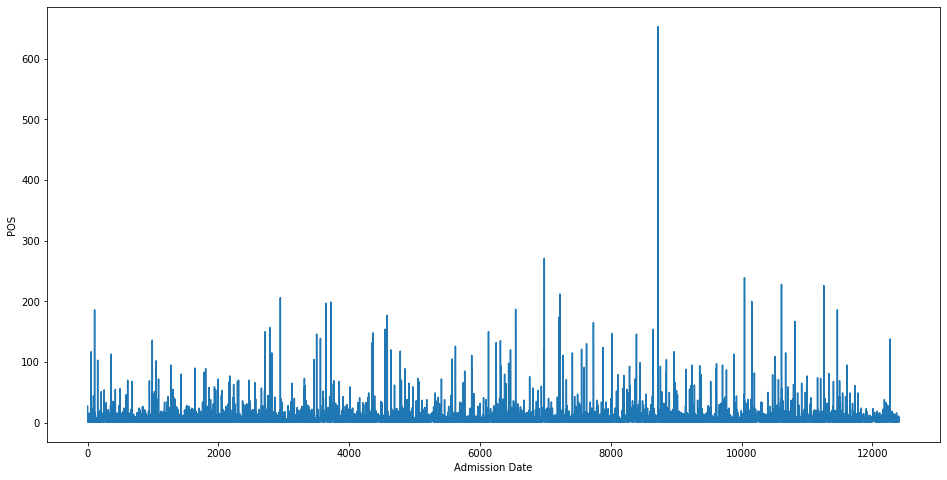

In [ ]:
# Plot for FillPercentage value vs Date
plt.figure(figsize=(16,8))
df1['LOS'].plot()
plt.xlabel('Admission Date')
plt.ylabel('POS')
plt.show()

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df1['LOS'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -60.885853
p-value                            0.000000
#Lags Used                         2.000000
Number of Observations Used    12408.000000
Critical Value (1%)               -3.430877
Critical Value (5%)               -2.861773
Critical Value (10%)              -2.566894
dtype: float64


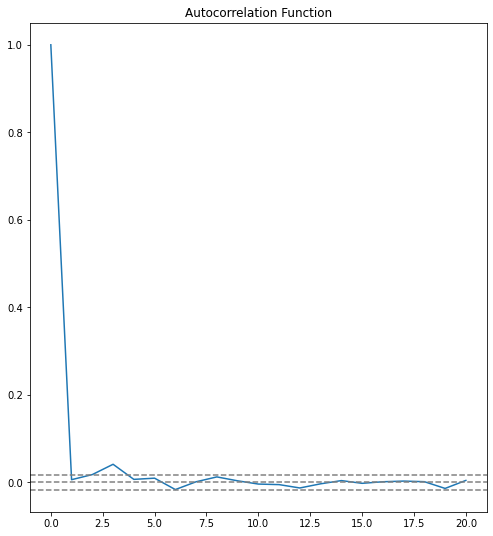

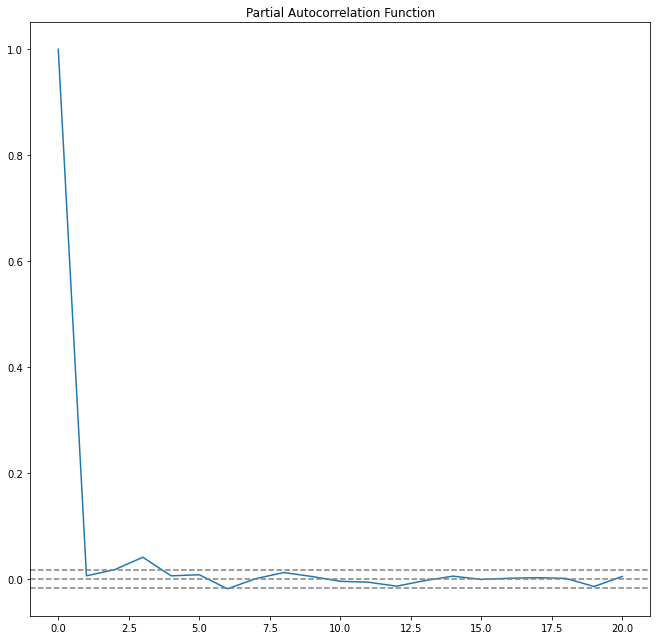

In [ ]:
#ACF and PACF plots

lag_acf = acf(df1['LOS'], nlags=20)
lag_pacf = pacf(df1['LOS'], nlags=20, method='ols')

#Plot ACF:
plt.figure(figsize =(18,9))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.figure(figsize =(18,9))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 

Plotting ARIMA model


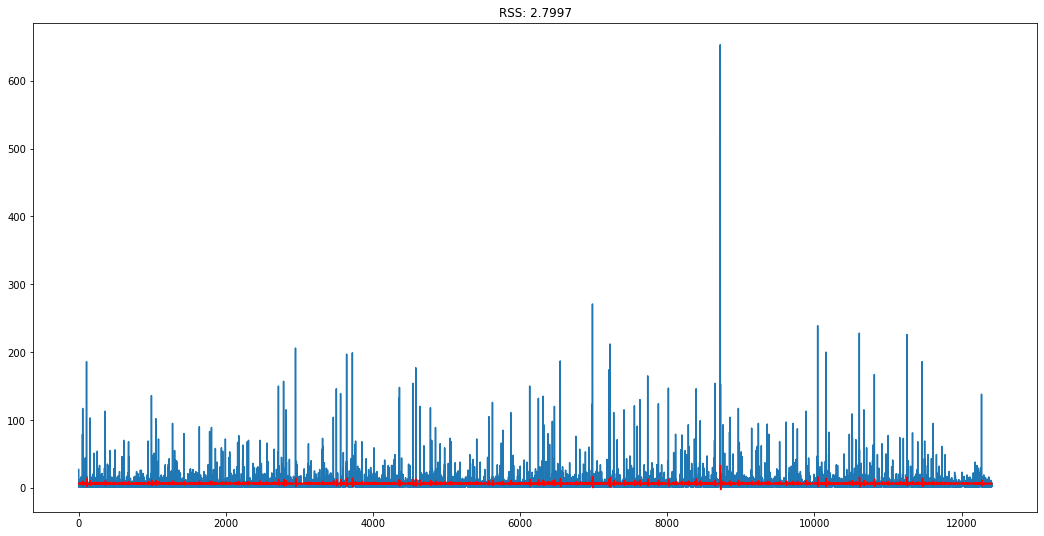

In [ ]:
# AR+I+MA = ARIMA model
model = ARIMA(df1['LOS'], order=(6,0,5))
results_ARIMA = model.fit(disp=-1)
plt.plot(df1['LOS'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - df1['LOS'])))
print('Plotting ARIMA model')

In [ ]:
# ARIMA Forecated results
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

0    6.356189
1    6.476119
2    6.684708
3    7.069466
4    6.111308
dtype: float64


# Model Evaluation

In [ ]:
# Evaluation metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    # acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(df1['LOS'], predictions_ARIMA_diff)

{'mae': 5.547089818600649,
 'mape': 0.8721211023613349,
 'me': -0.00022557985581285396,
 'mpe': 0.0035272703603491757,
 'rmse': 14.298378185692824}

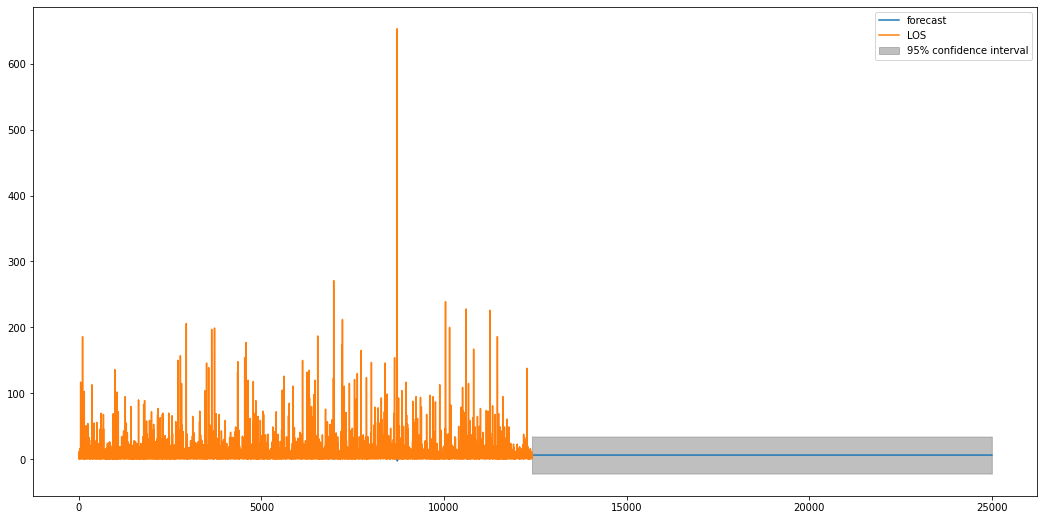

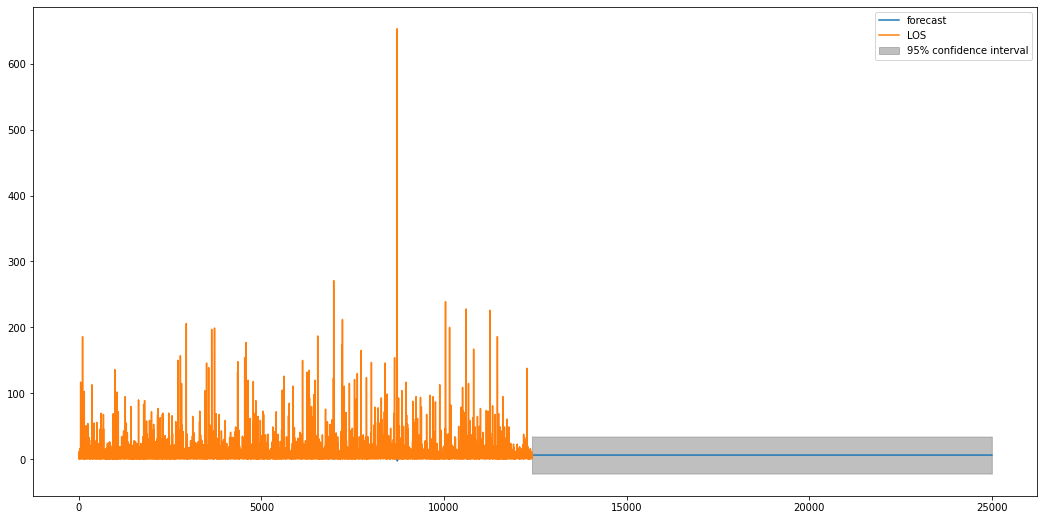

In [ ]:
#And we want to forecast for additional 7000 data points or 1 month.
fc = results_ARIMA.predict(start=1, end=17000, dynamic=False)
results_ARIMA.plot_predict(1,25000) 

# LSTM Forecasting

In [ ]:
los_data = df1['LOS'].values
los_data = los_data.reshape((-1,1))

split_percent = 0.80 #split data as 80% training set and 20% test set
split = int(split_percent*len(los_data))

los_train = los_data[:split]
los_test = los_data[split:]

date_train = df1['Admission date and time'][:split]
date_test = df1['Admission date and time'][split:]

print(len(los_train))
print(len(los_test))

9928
2483


In [ ]:
#import librarries required for LSTM modeling
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator

#converting the data from sequence to supervised data to train LSTM model
look_back = 15

train_generator = TimeseriesGenerator(los_train, los_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(los_test, los_test, length=look_back, batch_size=1)

In [ ]:
#import keras models and layers for LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse') #model compilation

num_epochs = 20
m = model.fit_generator(train_generator, epochs=num_epochs, verbose=1) #model training

Epoch 1/20
496/496 [==============================] - 4s 5ms/step - loss: 195.1213
Epoch 2/20
496/496 [==============================] - 3s 6ms/step - loss: 179.2789
Epoch 3/20
496/496 [==============================] - 3s 5ms/step - loss: 324.9279
Epoch 4/20
496/496 [==============================] - 3s 6ms/step - loss: 209.4511
Epoch 5/20
496/496 [==============================] - 3s 6ms/step - loss: 164.8599
Epoch 6/20
496/496 [==============================] - 3s 6ms/step - loss: 208.0182
Epoch 7/20
496/496 [==============================] - 3s 6ms/step - loss: 192.1570
Epoch 8/20
496/496 [==============================] - 3s 6ms/step - loss: 316.3565
Epoch 9/20
496/496 [==============================] - 3s 6ms/step - loss: 205.2810
Epoch 10/20
496/496 [==============================] - 3s 5ms/step - loss: 167.8145
Epoch 11/20
496/496 [==============================] - 3s 6ms/step - loss: 231.7371
Epoch 12/20
496/496 [==============================] - 3s 6ms/step - loss: 352.9397
E

In [ ]:
import plotly.graph_objects as go #library for visualization

prediction = model.predict_generator(test_generator) #forecast/predict for test data


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=100):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [ ]:
testD = create_dataset(los_test, 100)

In [ ]:
# Evaluation metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    # # corr = np.corrcoef(forecast, actual)[0,1]   # corr
    # mins = np.amin(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    # maxs = np.amax(np.hstack([forecast[:,None], 
    #                           actual[:,None]]), axis=1)
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(testD[1], prediction)

{'mae': 5.431802406377229,
 'mape': 0.8608804964542932,
 'me': -0.1337390324524466,
 'mpe': -0.006069165919836318,
 'rmse': 13.740439915160286}